## Parte 1

### 1. ¿Cuál es la diferencia entre el aprendizaje supervisado y el aprendizaje no supervisado?

#### R: La diferencia existe en que el aprendizaje supervisado busca encontrar relaciones y/o patrones que existen entre variables de entrada y salida, dentro de un set de datos etiquetados, el aprendizaje no supervisado busca relaciones solo entre las variables de entrada pero sin una "supervisión" o guía, además se aplica para datos sin etiquetas.

### 2. En la industria de la salud, a menudo se utiliza el machine learning para predecir la probabilidad de enfermedades o condiciones médicas en función de diferentes variables de entrada, como síntomas, antecedentes médicos y factores de estilo de vida. Imagina que tienes un conjunto de datos que contiene información de pacientes y su diagnóstico (enfermo/no enfermo). ¿Qué tipo de aprendizaje utilizarías para construir un modelo predictivo?

#### R: En este caso usaría el aprendizaje supervisado (clasificación), ya que cuento con las variables de entrada que en este caso serían los antecedentes médicos y los factos de estilos de vida y también se cuenta con la información de salida que sería si un paciente está enfermo o no enfermo, eso corresponde a la etiqueta de cada paciente.

### 3. ¿Por qué razón es necesario dividir el set de datos en 2 set de datos al momento de realizar algún modelamiento supervisado? ¿Cuáles son los 2 set de datos y cúal es la función de cada uno?

#### R: Porque sirve para evaluar de manera objetiva la capacidad del modelo para generalizar a datos nuevos e invisibles. Los dos sets de datos son los datos de entrenamiento los cuales sirven para entrenar el modelo o sea para que el algoritmo aprenda los patrones. El otro tipo de dato corresponden a los de test o prueba, los cuales sirven para evaular el modelo ya entrenado, es decir, estimar que tan bien irá el modelo con nuevos datos reales.

### 4.¿Cuál es la principal diferencia en el modelamiento de la regresión lineal para unenfoque estadístico y un enfoque de aprendizaje de máquinas?

#### R: La diferencia es que el enfoque estadístico busca interpretar la relación entre variables, evaluando y la significancia. Mientras que el machine learning busca predecir con precisión que prioriza más en datos nuevos.

### 5. Escoge una industria de acuerdo a su área de interés, rubro de trabajo o área de estudios (por ejemplo, salud, telecomunicaciones, retail, medioambiente, etc).Menciona al menos 1 aplicación en esa industria de:
### a. Aprendizaje Supervisado (Clasificación)
### b. Aprendizaje Supervisado (Regresión)
### c. Aprendizaje No Supervisado (Clustering)
### d. Aprendizaje No Supervisado (Reducción de dimensionalidad)

#### Área seleccionada: Retail
#### Aprendizaje Supervisado (Clasificación): Predicción abandono de clientes, clasifica si un cliente comprará o no, en base a su historial
#### Aprendizaje Supervisado (Regresión): Pronostico de ventas: predecir el monto de ventas futuras para un producto o tienda, usando variables como estacionalidad, promociones y tendencias pasadas.
#### Aprendizaje No Supervisado (Clustering): Segmentación de clientes: agrupar clientes según sus hábitos de compra para diseñar estrategias de marketing personalizadas.
#### Aprendizaje No Supervisado (Reducción de dimensionalidad): Visualización de productos: reducir miles de características de productos (categoría, precio, marca, etc.) a 2 o 3 dimensiones para analizarlos visualmente y encontrar patrones o similitudes.

## Parte 2

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd 

#Cargando el archivo 
file_path = "data-housing.xlsx"
df = pd.read_excel(file_path)

# Mostrar los tipos de datos y las primeras filas
dtypes = df.dtypes
head = df.head()

df.head(10)


,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,no,no,yes,2
1,12250000,8960,4,4,4,no,no,yes,3
2,12250000,9960,3,2,2,no,no,no,2
3,12215000,7500,4,2,2,no,no,yes,3
4,11410000,7420,4,1,2,yes,no,yes,2
5,10850000,7500,3,3,1,no,no,yes,2
6,10150000,8580,4,3,4,no,no,yes,2
7,10150000,16200,5,3,2,no,no,no,0
8,9870000,8100,4,1,2,yes,no,yes,2
9,9800000,5750,3,2,4,yes,no,yes,1


In [2]:
# Mirando tipos de datos del dataset
dtypes


price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
guestroom          object
hotwaterheating    object
airconditioning    object
parking             int64
dtype: object

In [3]:
#Tratamiento de valores nulos en columnas categóricas object
# Identificar columnas object
object_cols =  df.select_dtypes(include="object")

# Reemplazar valores nulos en cada columna object con la moda (valor más frecuente)
df_object_filled = df.copy()
for col in object_cols.columns:
    mode_value = df_object_filled[col].mode().iloc[0]
    df_object_filled[col].fillna(mode_value, inplace=True)

# Contar nulos después del reemplazo para asegurarse que se llenaron
nulls_after_object = df_object_filled[object_cols.columns].isnull().sum()

df_object_filled_shape = df_object_filled.shape
nulls_after_object

C:\Users\daclv\AppData\Local\Temp\ipykernel_22196\4074269619.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_object_filled[col].fillna(mode_value, inplace=True)


guestroom          0
hotwaterheating    0
airconditioning    0
dtype: int64

In [4]:
#Tratamiento de valores nulos en columnas númericas 
# Identificar columnas numéricas (int)
numeric_cols = df.select_dtypes(include=["int64"])

# Reemplazar valores nulos con la media de cada columna
df_numeric_filled = df.copy()
for col in numeric_cols.columns:
    mean_value = df_numeric_filled[col].mean()
    df_numeric_filled[col].fillna(mean_value, inplace=True)

# Verificar que no queden nulos
nulls_after_numeric = df_numeric_filled[numeric_cols.columns].isnull().sum()

df_numeric_filled_shape = df_numeric_filled.shape
nulls_after_numeric

C:\Users\daclv\AppData\Local\Temp\ipykernel_22196\2967130780.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_numeric_filled[col].fillna(mean_value, inplace=True)


price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

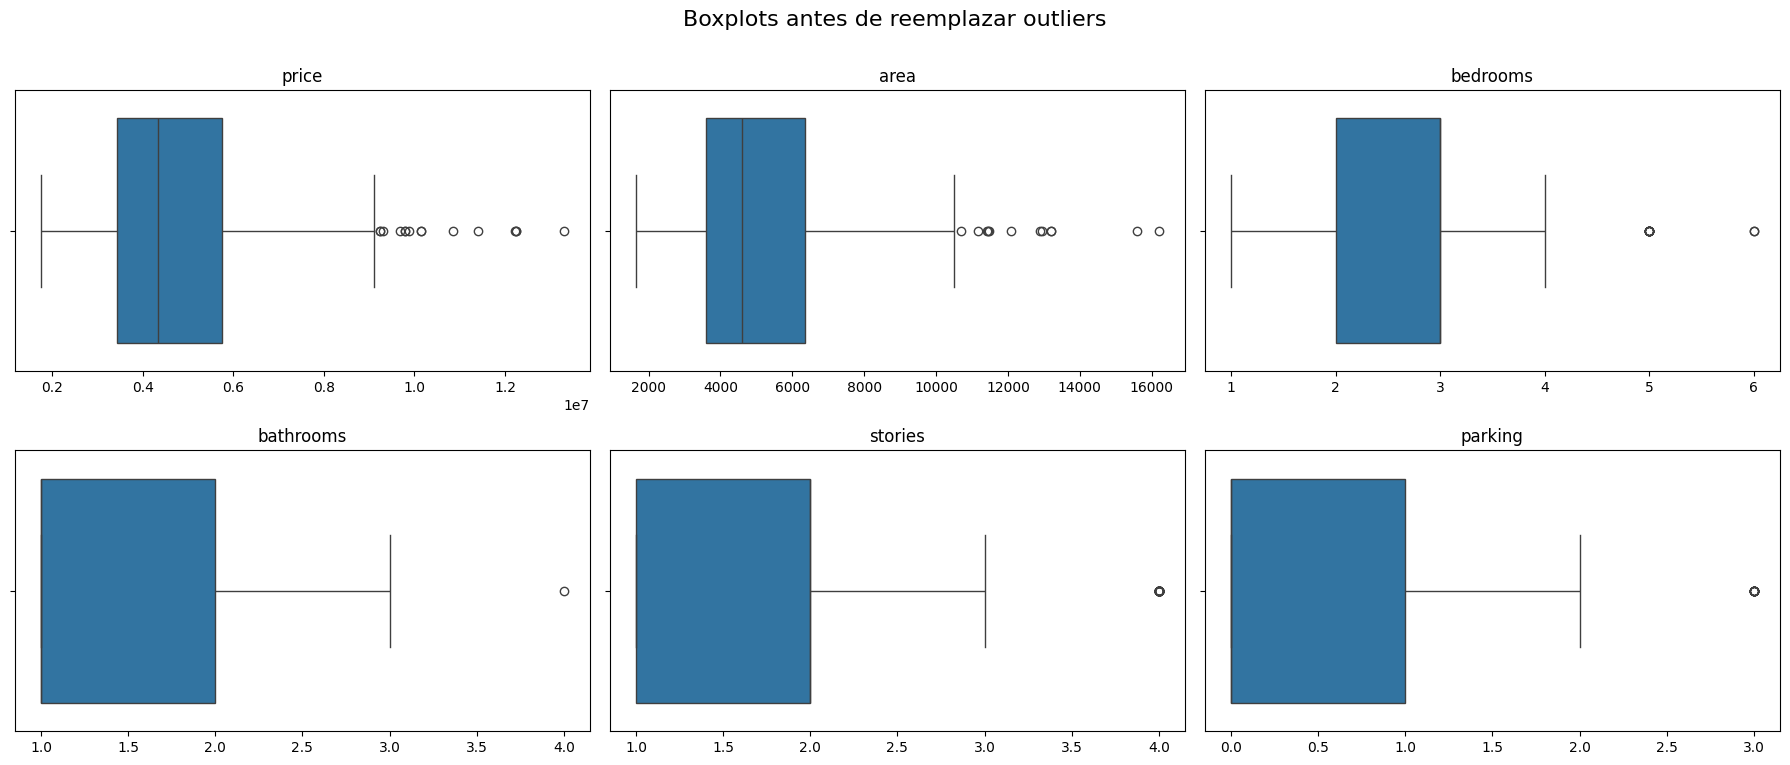

In [5]:
# Detección de valores outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar boxplots en un arreglo
def plot_boxplots(df, columns, title):
    num_cols = len(columns)
    num_rows = (num_cols + 2) // 3  # hasta 3 por fila
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel("")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  # eliminar ejes vacíos

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

# Columnas numéricas
numeric_columns = df_numeric_filled.select_dtypes(include=["int64"]).columns.tolist()

# Graficar boxplots antes de reemplazar outliers
plot_boxplots(df_numeric_filled, numeric_columns, "Boxplots antes de reemplazar outliers")


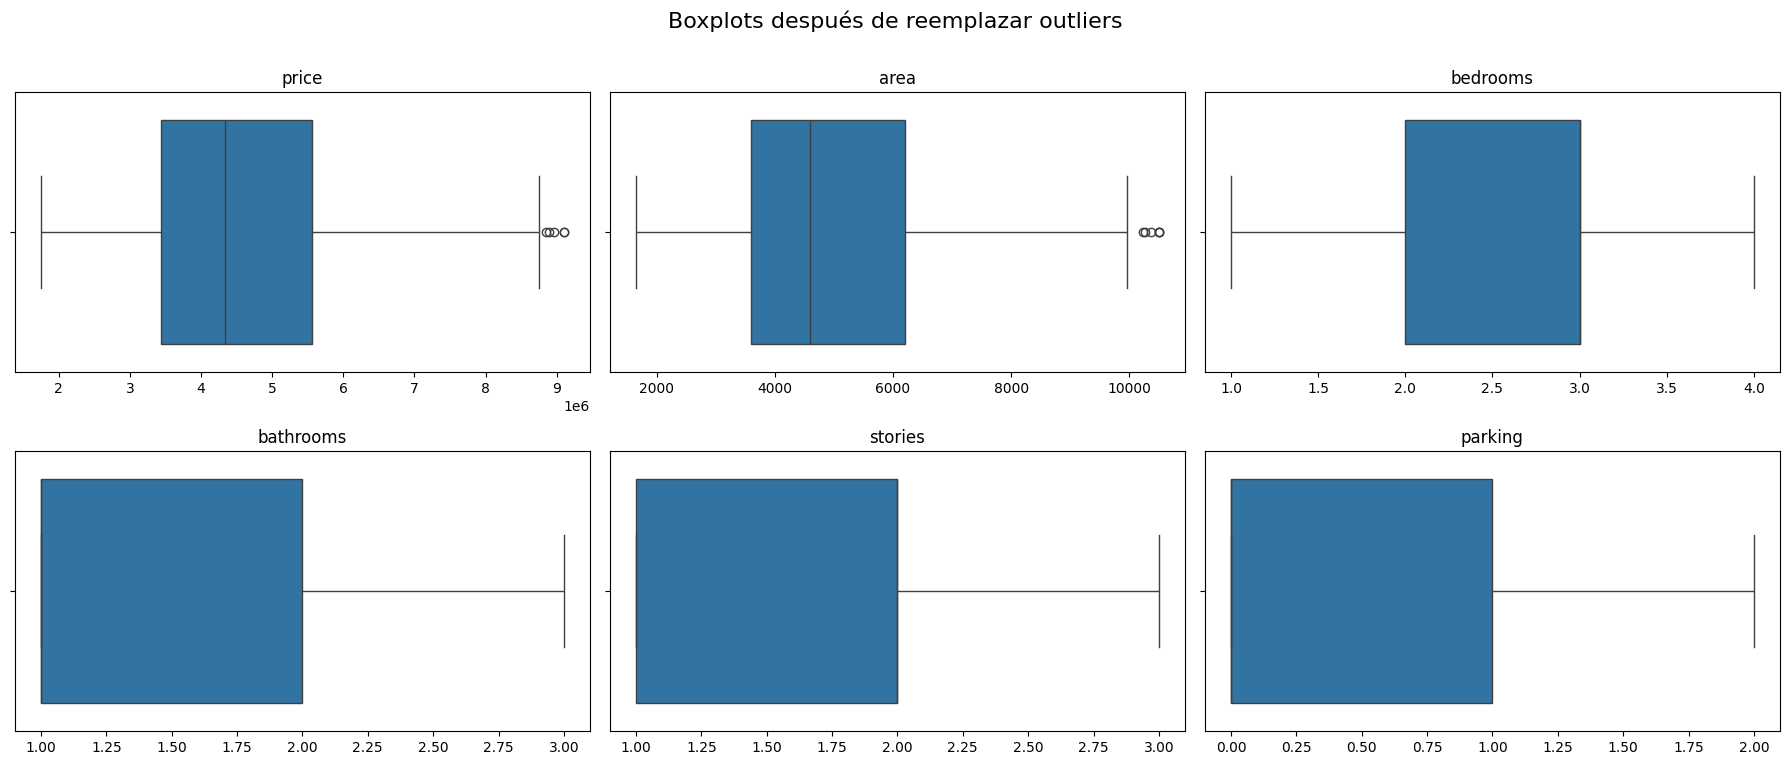

In [6]:
# Reemplanzando valores outliers
# Copia del DataFrame para tratamiento de outliers
df_outliers_replaced = df_numeric_filled.copy()

# Reemplazo de outliers por la media en cada columna numérica
for col in numeric_columns:
    if df_outliers_replaced[col].dtype in ["int64"]:
        mean_val = df_outliers_replaced[col].mean()
        q1 = df_outliers_replaced[col].quantile(0.25)
        q3 = df_outliers_replaced[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # Reemplazar outliers con la media
        df_outliers_replaced[col] = df_outliers_replaced[col].apply(
            lambda x: mean_val if x < lower_bound or x > upper_bound else x
        )

# Graficar boxplots después del reemplazo
plot_boxplots(df_outliers_replaced, numeric_columns, "Boxplots después de reemplazar outliers")

In [7]:
# Analizando posibles correlaciones
# Seleccionamos solo las variables numéricas que nos interesan
columnas_seleccionadas = ['price', 'area','bedrooms','bathrooms', 'stories', 'parking']
df_numeric = df_outliers_replaced[columnas_seleccionadas].dropna()

# Mostramos las primeras filas
df_numeric.head()

,price,area,bedrooms,bathrooms,stories,parking
0,4.766729e+06,7420.0,4.0,2.000000,3.000000,2.000000
1,4.766729e+06,8960.0,4.0,1.286239,1.805505,0.693578
2,4.766729e+06,9960.0,3.0,2.000000,2.000000,2.000000
3,4.766729e+06,7500.0,4.0,2.000000,2.000000,0.693578
4,4.766729e+06,7420.0,4.0,1.000000,2.000000,2.000000


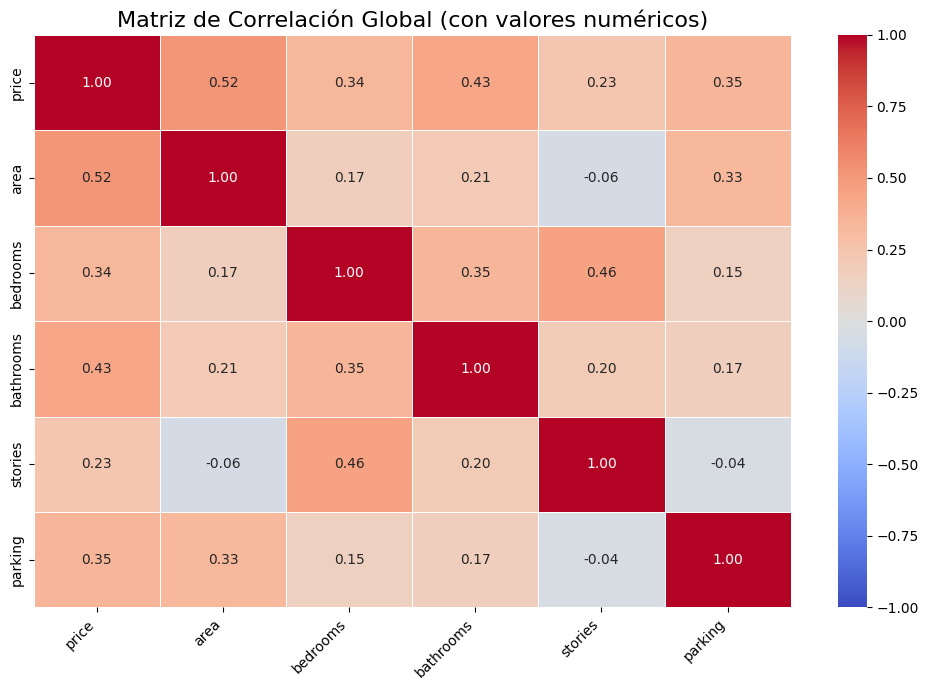

In [8]:
# Graficando la matriz de correlación
# Matriz de correlación
correlation_matrix = df_numeric.corr(numeric_only=True)

plt.figure(figsize=(10, 7))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.xticks(rotation=45, ha='right')
plt.title("Matriz de Correlación Global (con valores numéricos)", fontsize=16)
plt.tight_layout()
plt.show()

### Observaciones: De la tabla de matriz de correlación, se logra apreciar la correlación más alta entre el precio y el área.

## 8. Generando un modelo de regresión líneal

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Definir variables predictoras y objetivo (precio)
X = df_numeric[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df_numeric['price']

# Dividir en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Mostrar los coeficientes del modelo
modelo.coef_, modelo.intercept_

(array([3.50645276e+02, 1.47227238e+05, 9.92757230e+05, 4.21676769e+05,
        3.30074644e+05]),
 np.float64(272056.0126071945))

## 9. Evaluando modelo


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Predicción sobre los datos de prueba
y_pred_train = modelo.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

print("Entrenamiento: ")
print ("r2: ", r2_train)
print ("MAE: ", mae_train)
print ("MSE: ", mse_train)
print ("RMSE: ", rmse_train)

# Evaluación del modelo con datos de prueba
y_pred = modelo.predict(X_test)

# Métricas de rendimiento
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Prueba: ")
print ("r2: ", r2)
print ("MAE: ", mae)
print ("MSE: ", mse)
print ("RMSE: ", rmse)

Entrenamiento: 
r2:  0.4764981375579572
MAE:  848104.8018335421
MSE:  1229181484193.9685
RMSE:  1108684.573805358
Prueba: 
r2:  0.34211142817660034
MAE:  1113263.8890871003
MSE:  1953830119956.5317
RMSE:  1397794.7345574498


### Interpretación de resultados

#### 1. $R^2$ (Coeficiente de Determinación): 
##### Significa que solo el 34.21% de la variabilidad del precio se explica en los datos de prueba

#### 2. MAE (Error Absoluto Medio)
##### Significa que el modelo se equivoca en el precio, en promedio, un valor de $1.113.263 al intepretar el precio.

#### 3. MSE (Error Cuadrático Medio)
##### Significa que el error es mayor en el conjunto de prueba (1,95b), lo que sugiere que el modelo no generaliza perfectamente fuera del entrenamiento. 

#### 4.RMSE (Raíz del MSE)
##### De acuerdo al resultado, podría sugerir que algunos erros podrían ser grandes.

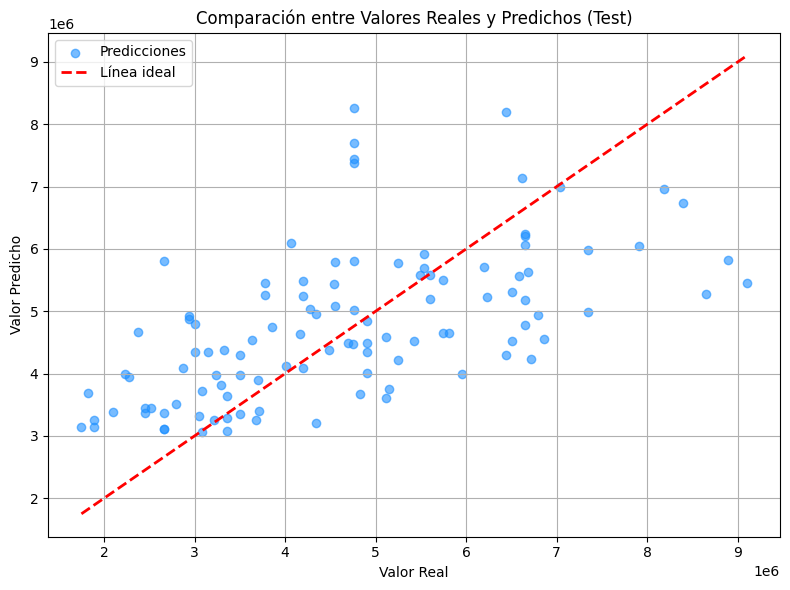

In [11]:
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Gráfico de dispersión: valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea ideal')

plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Comparación entre Valores Reales y Predichos (Test)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()